<a href="https://colab.research.google.com/github/pedro-nog-9/export_2012_2022/blob/main/exporta%C3%A7%C3%B5es_2012_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Leitura e decomposição dos dados tratados**

## O arquivo 'serie_2012_2022.csv' foi compilado de todas as exportações do período disponível separadamente por ano no portal do ministério da aconomia. A decomposição se deu nas tabelas: 'Aumento', 'Aceleração' e 'Média Móvel' e a soma acumulada dos meses de cada ano em US$ Bilhões.

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
exportacoes = pd.read_csv('serie_2012_2022.csv')

In [3]:
exportacoes.DATA = pd.to_datetime(exportacoes.DATA)

In [4]:
exportacoes

,DATA,VL_FOB
0,2012-06-01,21925
1,2012-06-01,17164
2,2012-06-01,1490086
3,2012-06-01,84614
4,2012-06-01,14720
...,...,...
13276624,2022-11-01,5489
13276625,2022-01-01,26
13276626,2022-09-01,1295568
13276627,2022-08-01,1930


In [5]:
id=[]
for i in range(132):
    id.append(i)

meses = pd.crosstab(exportacoes.DATA, '', aggfunc = 'sum', values = exportacoes.VL_FOB/1000000000)
meses['Data'] = meses.index.copy()
meses.index = id
meses.columns.values[0] = 'Valores'
meses = meses[['Data', 'Valores']]
meses = meses.copy()
meses['Aumento'] = meses.Valores.diff()
meses['Aceleracao'] = meses.Aumento.diff()
meses['Media Movel'] = meses.Valores.rolling(3).mean()

In [6]:
meses

col_0,Data,Valores,Aumento,Aceleracao,Media Movel
0,2012-01-01,15.949177,NaN,NaN,NaN
1,2012-02-01,17.926499,1.977322,NaN,NaN
2,2012-03-01,20.739368,2.812869,0.835547,18.205015
3,2012-04-01,19.461605,-1.277764,-4.090633,19.375824
4,2012-05-01,23.146072,3.684468,4.962232,21.115682
...,...,...,...,...,...
127,2022-08-01,30.786909,0.942584,3.840454,31.124476
128,2022-09-01,28.587334,-2.199575,-3.142159,29.739523
129,2022-10-01,26.852476,-1.734858,0.464717,28.742240
130,2022-11-01,27.652303,0.799827,2.534685,27.697371


# Análise dos meses

O DataFrame a seguir mostra o desempenho médio de cada mês através da função .groupby() em ordem decresente do valor médio exportado por mês.

Percebe-se que os meses com a maior média são os meses do meio do ano, enquanto os meses do início e do fim do ano apresentam os menores desempenhos

In [7]:
meses['Meses'] = meses.Data.dt.month_name()
meses_traduzidos = {'January': 'Janeiro', 'February':'Fevereiro', 'March':'Março', 'April':'Abril', 'May':'Maio', 'June':"Junio", 'July':'Julho',
       'August':'Agosto', 'September':'Setembro', 'October':'Outubro', 'November':'Novembro', 'December':'Dezembro'}
meses.Meses = meses.Meses.map(meses_traduzidos)
valores_agrupados = meses.groupby('Meses')[['Valores','Aumento','Aceleracao']].mean().round(2)
valores_agrupados.sort_values(by='Valores',ascending=False)

col_0,Valores,Aumento,Aceleracao
Meses,,,
Maio,21.04,1.17,1.18
Junio,20.94,-0.10,-1.27
Julho,20.91,-0.03,0.07
Agosto,20.84,-0.07,-0.04
Abril,19.87,-0.01,-3.86
Março,19.87,3.85,3.22
Setembro,19.87,-0.97,-0.91
Outubro,19.66,-0.20,0.77
Dezembro,19.31,1.05,2.46


# Gráficos da Série Temporal em Meses x US$ Bilhões



**Para ficar mais evidente, o gráfico de desempenho mensal no intervalo 2012-2022:**

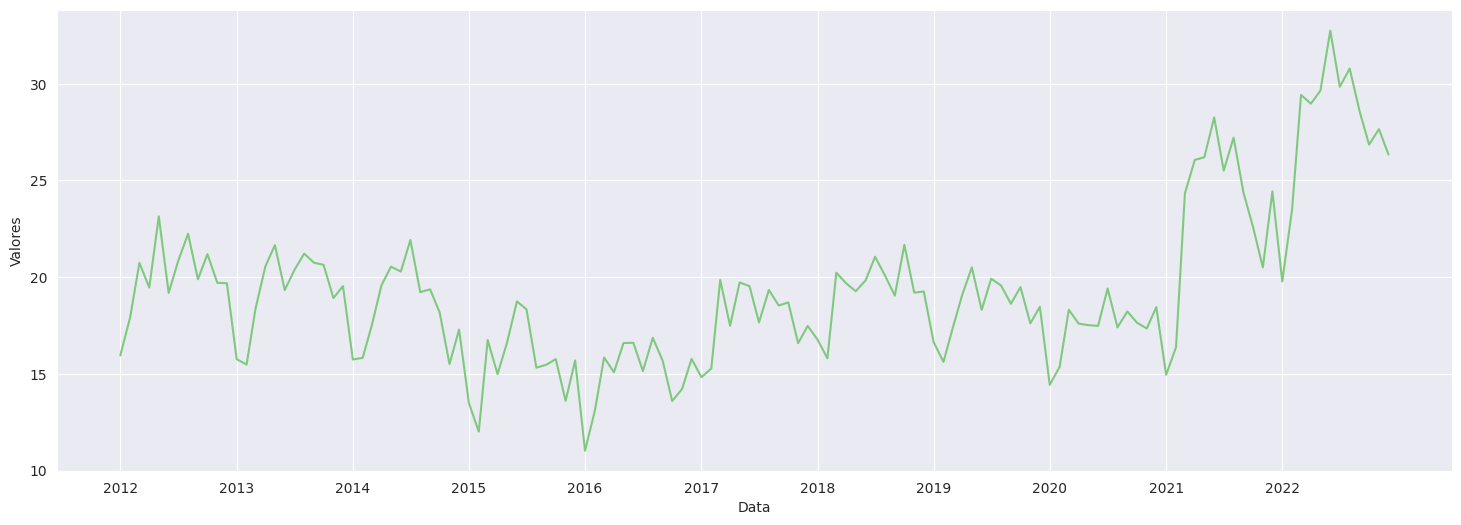

In [8]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax=sns.lineplot(x='Data',y='Valores',data=meses)
ax.set_xticks(['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'])
ax.set_xticklabels(['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'])
ax.figure.set_size_inches(18, 6)
ax=ax

**Para uma melhor visualiazação, o gráfico com ruído suavizado pela média móvel de 3 meses**

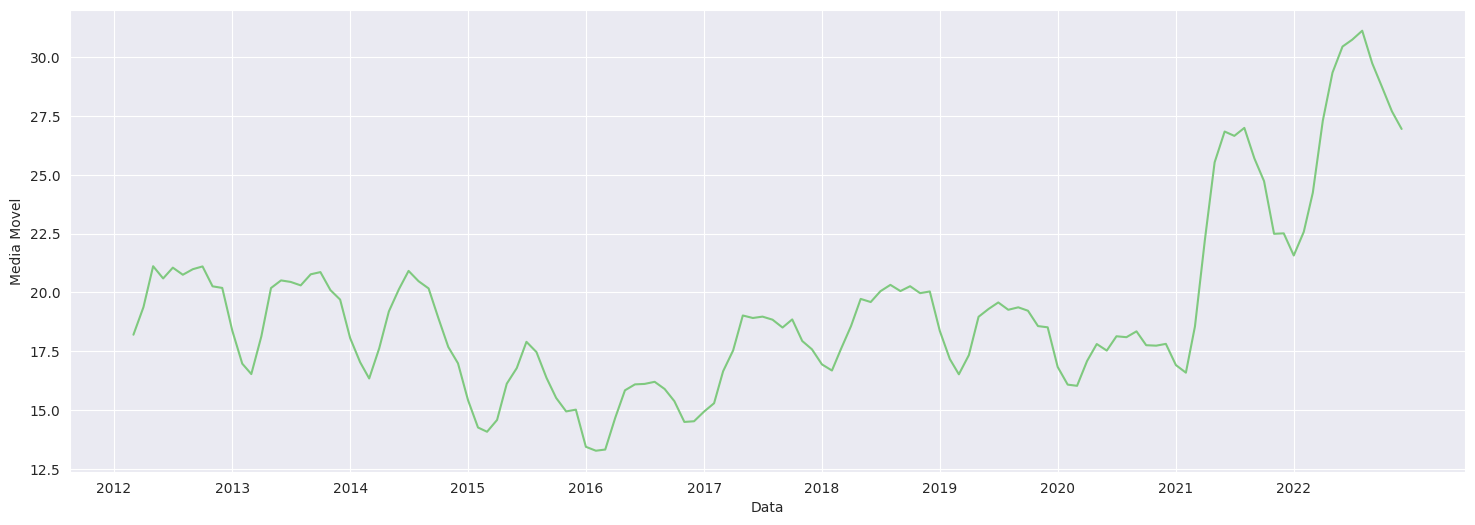

In [9]:
ax=sns.lineplot(x='Data',y='Media Movel',data=meses)
ax.set_xticks(['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'])
ax.set_xticklabels(['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'])
ax.figure.set_size_inches(18, 6)
ax=ax

**Autocorrelação**

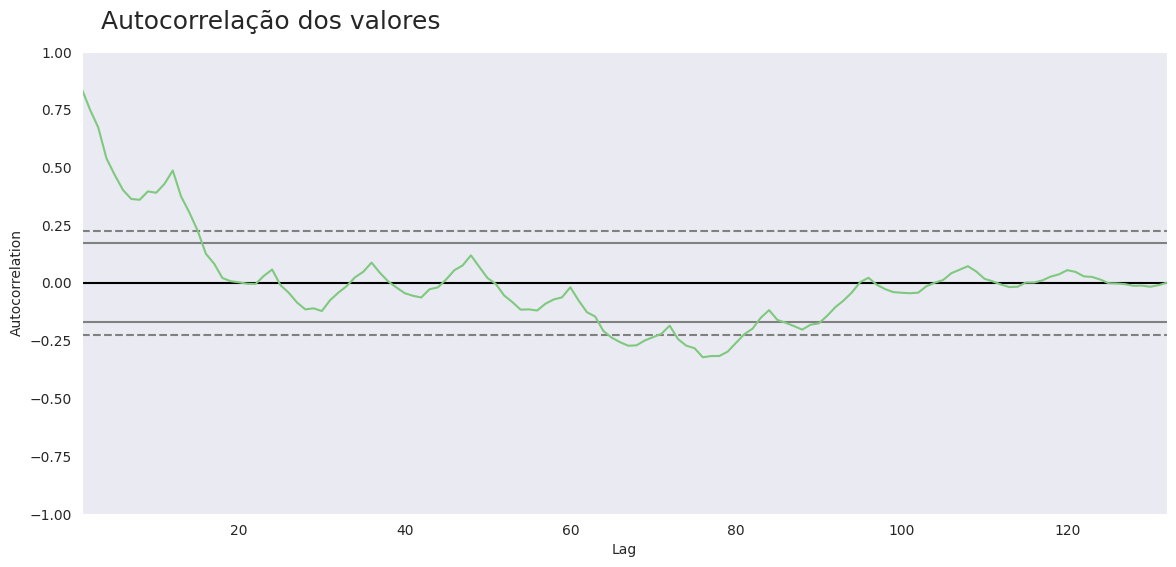

In [10]:
from pandas.plotting import autocorrelation_plot
ax = plt.figure(figsize=(14,6))
ax.suptitle('Autocorrelação dos valores',fontsize=18,x=0.26,y=0.95)
pd.plotting.autocorrelation_plot(meses.Valores)
ax = ax